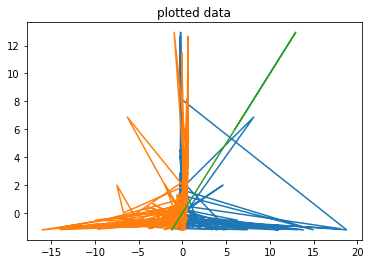

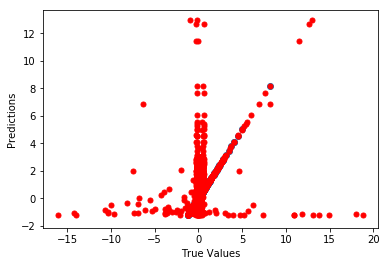

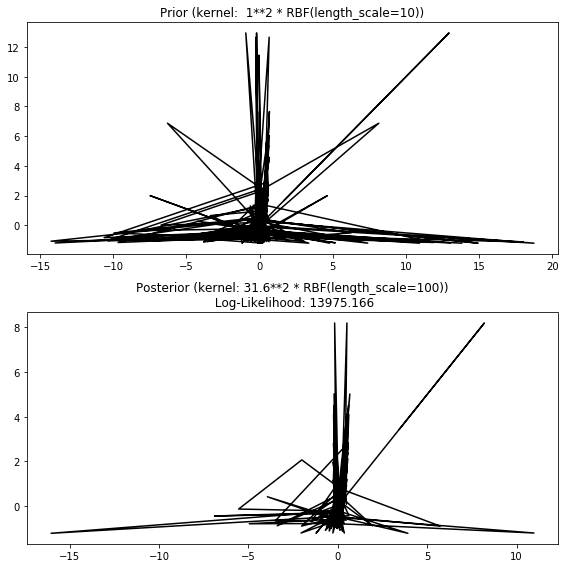

[[-1.09856702e-01]
 [-6.04035348e-01]
 [-4.23057660e-01]
 [ 7.93136224e-01]
 [-1.92395590e-01]
 [ 1.20951235e-02]
 [-1.30840935e-01]
 [ 4.42706011e-01]
 [ 6.45539217e-01]
 [-3.63079213e-01]
 [-4.70437355e-01]
 [-4.93544087e-01]
 [ 4.75646786e-01]
 [-3.71642955e-01]
 [-2.43916586e-02]
 [-3.44568282e-01]
 [ 1.44315456e+00]
 [-3.59359868e-01]
 [-6.85820155e-01]
 [-4.26013090e-01]
 [-2.88113728e-01]
 [-7.15183839e-01]
 [ 4.86483254e-01]
 [-3.97017598e-03]
 [ 2.49670893e-01]
 [-4.74272370e-01]
 [ 1.31115466e-01]
 [ 5.42799674e-01]
 [-7.39511594e-01]
 [-1.20189480e+00]
 [-2.96129331e-01]
 [-6.52480125e-01]
 [ 6.65034831e-01]
 [-2.56053478e-01]
 [ 5.75863063e-01]
 [ 1.19542353e+00]
 [-2.74302781e-01]
 [-5.13731927e-01]
 [-1.54357389e-01]
 [ 1.55879624e-01]
 [-1.88526288e-01]
 [ 2.59658083e-01]
 [-2.65500940e-01]
 [ 8.77359509e-02]
 [ 1.58129178e-01]
 [-6.97832473e-01]
 [ 1.14284996e+00]
 [-6.56459913e-01]
 [-1.96579397e-01]
 [-1.21431933e+00]
 [-4.54996996e-01]
 [ 1.28231883e-01]
 [-6.0346675

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go
import itertools
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
###################################################################################################33
#first the datasets: bot_compiled and non_bot_compiled are to be merged into a single matrix
is_bot=pd.read_excel('C:/Users/svbqb/Documents/Asst_NLP/bot_nonbot_scoring/RUI/bot_Scoring.xlsx').as_matrix()
non_bot=pd.read_excel('C:/Users/svbqb/Documents/Asst_NLP/bot_nonbot_scoring/RUI/nonbot_scoring.xlsx').as_matrix()
X = np.concatenate((is_bot,non_bot))
y=X[:,[2]]
class_names = ['is_bot','non_bot']

##########################################################################################################
# Split our data
x_train, x_test, y_train_labels, y_test_labels = train_test_split(X,y,test_size=0.33)
################################################################################################################
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(x_train, y_train_labels)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred = gp.predict(x_test)
#print(y_pred)

plt.plot(X, y)
#pl.axis([-5, 5, -3, 3])
plt.title('plotted data')
plt.show()
fig = plt.figure()
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')

plt.scatter(y_test_labels, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

# Plot prior
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
y_mean = gp.predict(x_train)
plt.plot(x_train, y_mean, 'k')
plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)
# Plot posterior
plt.subplot(2, 1, 2)
plt.plot(x_test, y_pred, 'k')
plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f" %(gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()
plt.show()
print(y_pred)